In [79]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [80]:
OUTLIER_THRESHOLD = 0.01

#Loading csv file as datafram in notebook, removing first three lines of data
df = pd.read_csv('DataProject1.csv', index_col="Timestamps")
df = df.iloc[4:]

print(df.describe())

            As_sell       Ks_sell       As_buys       Ks_buys       Spreads  \
count  33979.000000  33979.000000  33979.000000  33979.000000  33979.000000   
mean     100.003368      0.296929     99.047482      0.297026      0.555164   
std       85.377079      0.262147     83.723403      0.263549      0.304118   
min        5.092441      0.004059      5.971905      0.003737      0.059267   
25%       49.456199      0.132866     48.734513      0.132954      0.353860   
50%       76.398429      0.221690     75.231991      0.221601      0.508430   
75%      121.047551      0.366672    120.737639      0.366070      0.688749   
max     1504.354271      2.975397   1462.425081      3.090569     15.470974   

        Bid Density   Ask Density         Sizes       as_bids       as_asks  \
count  33979.000000  33979.000000  33979.000000  33979.000000  33979.000000   
mean       0.117448      0.113204      0.045868     -0.012808      0.012551   
std        0.129454      0.158685      0.013005    

In [81]:
#Initializing all relevant variables into their unique arrays

ks_sell =      np.array([df.iloc[idx].values[1] for idx in range(len(df))])
ks_buy =       np.array([df.iloc[idx].values[3] for idx in range(len(df))])
bid_density =  np.array([df.iloc[idx].values[5] for idx in range(len(df))])
ask_density =  np.array([df.iloc[idx].values[6] for idx in range(len(df))])
spread =       np.array([df.iloc[idx].values[4] for idx in range(len(df))])
bid_a =        np.array([df.iloc[idx].values[8] for idx in range(len(df))])
bid_b =        np.array([df.iloc[idx].values[10] for idx in range(len(df))])
ask_a =        np.array([df.iloc[idx].values[9] for idx in range(len(df))])
ask_b =        np.array([df.iloc[idx].values[11] for idx in range(len(df))])

#Distribution plots below in same order as shown above

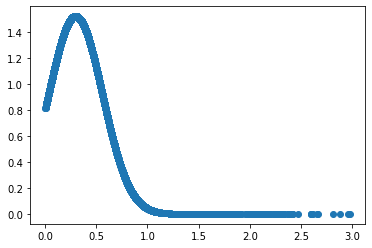

In [82]:
plt.scatter(ks_sell, stats.norm.pdf(ks_sell, np.mean(ks_sell), np.std(ks_sell)))
plt.show()

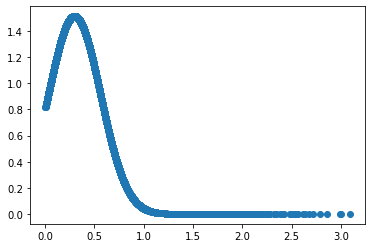

In [83]:
plt.scatter(ks_buy, stats.norm.pdf(ks_buy, np.mean(ks_buy), np.std(ks_buy)))
plt.show()

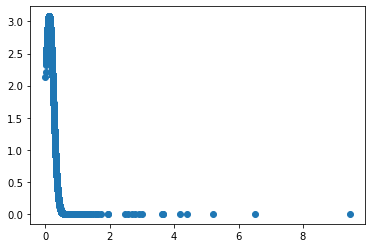

In [84]:
plt.scatter(bid_density, stats.norm.pdf(bid_density, np.mean(bid_density), np.std(bid_density)))
plt.show()

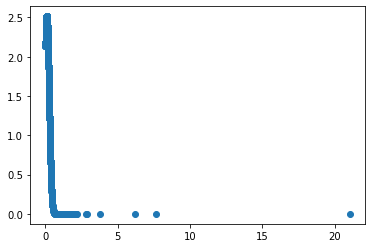

In [85]:
plt.scatter(ask_density, stats.norm.pdf(ask_density, np.mean(ask_density), np.std(ask_density)))
plt.show()

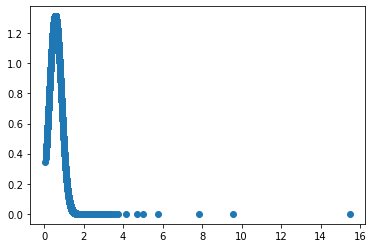

In [86]:
plt.scatter(spread, stats.norm.pdf(spread, np.mean(spread), np.std(spread)))
plt.show()

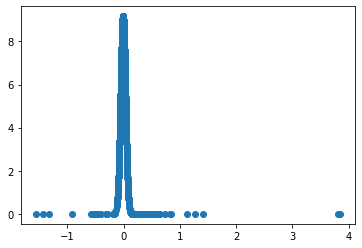

In [87]:
plt.scatter(bid_a, stats.norm.pdf(bid_a, np.mean(bid_a), np.std(bid_a)))
plt.show()

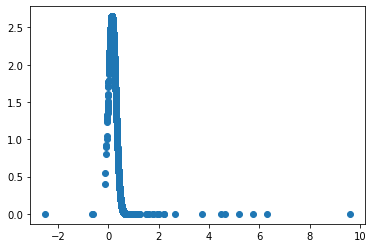

In [88]:
plt.scatter(bid_b, stats.norm.pdf(bid_b, np.mean(bid_b), np.std(bid_b)))
plt.show()

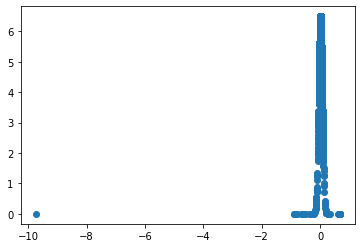

In [89]:
plt.scatter(ask_a, stats.norm.pdf(ask_a, np.mean(ask_a), np.std(ask_a)))
plt.show()

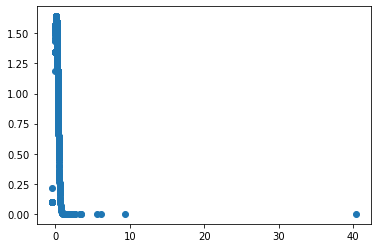

In [90]:
plt.scatter(ask_b, stats.norm.pdf(ask_b, np.mean(ask_b), np.std(ask_b)))
plt.show()

In [91]:
#Finding range allowing for discovery for extreme outliers

ks_sell_upper = np.percentile(ks_sell, 99)
ks_sell_lower = np.percentile(ks_sell, 0.01)

ks_buy_upper = np.percentile(ks_buy, 99)
ks_buy_lower = np.percentile(ks_buy, 0.01)

bid_density_upper = np.percentile(bid_density, 99)
bid_density_lower = np.percentile(bid_density, 0.01)

ask_density_upper = np.percentile(ask_density, 99)
ask_density_lower = np.percentile(ask_density, 0.01)

spread_upper = np.percentile(spread, 99)
spread_lower = np.percentile(spread, 0.01)

bid_a_upper = np.percentile(bid_a, 99)
bid_a_lower = np.percentile(bid_a, 0.01)

bid_b_upper = np.percentile(bid_b, 99)
bid_b_lower = np.percentile(bid_b, 0.01)

ask_a_upper = np.percentile(ask_a, 99)
ask_a_lower = np.percentile(ask_a, 0.01)

ask_b_upper = np.percentile(ask_b, 99)
ask_b_lower = np.percentile(ask_b, 0.01)

In [92]:
#Making boolean array to where outliers are located for each respective variable

ks_sell_mask = np.logical_and(ks_sell > ks_sell_lower, ks_sell < ks_sell_upper)
ks_buy_mask = np.logical_and(ks_buy > ks_buy_lower, ks_buy < ks_buy_upper)

bid_density_mask = np.logical_and(bid_density > bid_density_lower, bid_density < bid_density_upper)
ask_density_mask = np.logical_and(ask_density > ask_density_lower, ask_density < ask_density_upper)

spread_mask = np.logical_and(spread > spread_lower, spread < spread_upper)

bid_a_mask = np.logical_and(bid_a > bid_a_lower, bid_a < bid_a_upper)
bid_b_mask = np.logical_and(bid_b > bid_b_lower, bid_b < bid_b_upper)

ask_a_mask = np.logical_and(ask_a > ask_a_lower, ask_a < ask_a_upper)
ask_b_mask = np.logical_and(ask_b > ask_b_lower, ask_b < ask_b_upper)

In [93]:
#Making a boolean array such that True -> valid array, False -> invalid

total_mask = np.logical_and(ks_sell_mask, ks_buy_mask)
total_mask = np.logical_and(total_mask, bid_density_mask)
total_mask = np.logical_and(total_mask, ask_density_mask)
total_mask = np.logical_and(total_mask, spread_mask)
total_mask = np.logical_and(total_mask, bid_a_mask)
total_mask = np.logical_and(total_mask, bid_b_mask)
total_mask = np.logical_and(total_mask, ask_a_mask)
total_mask = np.logical_and(total_mask, ask_b_mask)

In [94]:
#Filtering data to only valid rows

ks_sell = ks_sell[total_mask]
ks_buy = ks_buy[total_mask]

bid_density = bid_density[total_mask]
ask_density = ask_density[total_mask]

spread = spread[total_mask]

bid_a = bid_a[total_mask]
bid_b = bid_b[total_mask]

ask_a = ask_a[total_mask]
ask_b = ask_b[total_mask]

In [95]:
#Finding mean and std for each variable

ks_sell_std, ks_sell_mean = np.std(ks_sell), np.mean(ks_sell)
ks_buy_std, ks_buy_mean = np.std(ks_buy), np.mean(ks_buy)

bid_density_std, bid_density_mean = np.std(bid_density), np.mean(bid_density)
ask_density_std, ask_density_mean = np.std(ask_density), np.mean(ask_density)

spread_std, spread_mean = np.std(spread), np.mean(spread)

bid_a_std, bid_a_mean = np.std(bid_a), np.mean(bid_a)
bid_b_std, bid_b_mean = np.std(bid_b), np.mean(bid_b)

ask_a_std, ask_a_mean = np.std(ask_a), np.mean(ask_a)
ask_b_std, ask_b_mean = np.std(ask_b), np.mean(ask_b)

In [ ]:
#Saving new information to established csv files

np.savetxt("params/ks_sell_std.csv", [ks_sell_std])
np.savetxt("params/ks_sell_mean.csv", [ks_sell_mean])
np.savetxt("params/ks_buy_std.csv", [ks_buy_std])
np.savetxt("params/ks_buy_mean.csv", [ks_buy_mean])
np.savetxt("params/ask_density_std.csv", [ask_density_std])
np.savetxt("params/ask_density_mean.csv", [ask_density_mean])
np.savetxt("params/bid_density_std.csv", [bid_density_std])
np.savetxt("params/bid_density_mean.csv", [bid_density_mean])
np.savetxt("params/spread_std.csv", [spread_std])
np.savetxt("params/spread_mean.csv", [spread_mean])
np.savetxt("params/bid_a_std.csv", [bid_a_std])
np.savetxt("params/bid_a_mean.csv", [bid_a_mean])
np.savetxt("params/bid_b_std.csv", [bid_b_std])
np.savetxt("params/bid_b_mean.csv", [bid_b_mean])
np.savetxt("params/ask_a_std,csv", [ask_a_std])
np.savetxt("params/ask_a_mean.csv", [ask_a_mean])
np.savetxt("params/ask_b_std,csv", [ask_b_std])
np.savetxt("params/ask_b_mean.csv", [ask_b_mean])

In [96]:
#Reshaping independent variables into 1-D vertical columns

bid_density = np.reshape(bid_density, (bid_density.shape[0], 1))
ask_density = np.reshape(ask_density, (ask_density.shape[0], 1))
spread = np.reshape(spread, (spread.shape[0], 1))
bid_a = np.reshape(bid_a, (bid_a.shape[0], 1))
bid_b = np.reshape(bid_b, (bid_b.shape[0], 1))
ask_a = np.reshape(ask_a, (ask_a.shape[0], 1))
ask_b = np.reshape(ask_b, (ask_b.shape[0], 1))

In [116]:
X_data = np.concatenate([bid_density, ask_density, spread, bid_a, bid_b, ask_a, ask_b], axis=1).T
print(X_data)

[[0.11611975 0.11421762 0.10038146 ... 0.09567644 0.06009128 0.06168841]
 [0.17467087 0.1060384  0.12321948 ... 0.05866025 0.05481681 0.05470654]
 [0.69768983 0.71079155 0.63412664 ... 0.42916592 0.42121408 0.45770903]
 ...
 [0.15598471 0.16176673 0.13325738 ... 0.11491566 0.06896541 0.06329883]
 [0.01727048 0.01232259 0.01492305 ... 0.00160684 0.00199322 0.00541509]
 [0.13940213 0.08095138 0.09285995 ... 0.05520216 0.05060197 0.04364842]]


In [107]:
#Applying data to our theoretical equation
def func(x, a0, a1, a2, a3, a4, a5, a6, a7, a8):

    bd = x[0]
    ad = x[1]
    sp = x[2]
    ba = x[3]
    bb = x[4]
    aa = x[5]
    ab = x[6]
   

    spread_qt = a0 / (a1 + sp)
    intercept = a8
    density_qt = bd * a2  + ad * a3 
    bid_qt = ba * a4 + bb * a5 
    ask_qt = aa * a6  + ab * a7 

    return spread_qt + intercept + density_qt + bid_qt + ask_qt

In [117]:
ask_params = curve_fit(f=func, xdata=X_data, ydata=ks_sell)[0]
bid_params = curve_fit(f=func, xdata=X_data, ydata=ks_buy)[0]

0.14348934792714654
0.14741267289396792


In [109]:
ask_res = [func(X_data[:, idx], ask_params[0], ask_params[1], ask_params[2], ask_params[3], ask_params[4], ask_params[5], ask_params[6], ask_params[7], ask_params[8]) for idx in range(X_data.shape[1])]
ask_res = np.array(ask_res)

In [110]:
ask_residuals = ask_res - ks_sell

In [111]:
bid_res = [func(X_data[:, idx], bid_params[0], bid_params[1], bid_params[2], bid_params[3], bid_params[4], bid_params[5], bid_params[6], bid_params[7], bid_params[8]) for idx in range(X_data.shape[1])]
bid_res = np.array(bid_res)

In [112]:
bid_residuals = bid_res - ks_buy

In [113]:
rss = ((ask_res - ks_sell)**2).sum()
tss = ((ks_sell - ks_sell.mean())**2).sum()
print(f'{1 - rss/tss=}')

1 - rss/tss=0.5539639689421123


In [114]:
rss = ((bid_res - ks_buy)**2).sum()
tss = ((ks_buy - ks_buy.mean())**2).sum()
print(f'{1 - rss/tss=}')

1 - rss/tss=0.5464757448213984


In [115]:
ask_residuals_std, ask_residuals_mean = np.std(ask_residuals), np.mean(ask_residuals)
bid_residuals_std, bid_residuals_mean = np.std(bid_residuals), np.mean(bid_residuals)
print(f"For Ask Residuals, Mean: {ask_residuals_mean}, Std: {ask_residuals_std}")
print(f"For Bid Residuals, Mean: {bid_residuals_mean}, Std: {bid_residuals_std}")

For Ask Residuals, Mean: -7.207188781148744e-09, Std: 0.1435477472106807
For Bid Residuals, Mean: -9.656737083004476e-09, Std: 0.14513430727609508


In [ ]:
np.savetxt("params/ask_residuals_std.csv", [ask_residuals_std])
np.savetxt("params/ask_residuals_mean.csv", [ask_residuals_mean])
np.savetxt("params/bid_residuals_std.csv", [bid_residuals_std])
np.savetxt("params/bid_residuals_mean.csv", [bid_residuals_mean])

In [ ]:
#Creates a network with 5 convolutional layers, followed by a fully connected layer. 
#1 layer of zero-padding is applied to the right and bottom side of the board.
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.fc1 = nn.Linear(7, 14)
        self.fc2 = nn.Linear(14, 14)
        self.fc3 = nn.Linear(14, 28)
        self.fc4 = nn.Linear(28, 1)

        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        return x

In [ ]:
bid_density -= bid_density_mean
bid_density_mean /= bid_density_std

ask_density -= ask_density_mean
ask_density_mean /= ask_density_std

spread -= spread_mean
spread /= spread_std

bid_a -= bid_a_mean
bid_a /= bid_a_std

bid_b -= bid_b_mean
bid_b /= bid_b_std

ask_a -= ask_a_mean
ask_a /= ask_a_std

ask_b -= ask_b_mean
ask_b /= ask_b_std

In [ ]:
X_data_norm = np.concatenate([bid_density, ask_density, spread, bid_a, bid_b, ask_a, ask_b], axis=1)
X_data_norm = torch.from_numpy(X_data_norm).to(device).float()

ask_residuals -= ask_residuals_mean
ask_residuals /= ask_residuals_std

bid_residuals -= bid_residuals_mean
bid_residuals /= bid_residuals_std

ask_residuals = torch.from_numpy(ask_residuals).to(device).float()
bid_residuals = torch.from_numpy(bid_residuals).to(device).float()

In [ ]:
def train(net: ResNet, side):
    optimizer=optim.Adam(params=net.parameters(), lr=0.001)
    objective=nn.MSELoss()


    
    losses=[]
    iters = 0
    while iters < 20000:
        optimizer.zero_grad()
        preds = net(X_data_norm)
        preds = preds.squeeze()

        if side == "ask":
            loss=objective(preds, ask_residuals)
        else:
            loss=objective(preds, bid_residuals)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        iters += 1

    plt.plot(losses)

In [ ]:
net = ResNet().to(device)
train(net, "ask")
with torch.no_grad():
    ask_residuals_preds = net(X_data_norm).squeeze()
ask_residuals_preds *= ask_residuals_std
ask_residuals_preds += ask_residuals_mean

ask_residuals_preds = ask_residuals_preds.cpu().numpy()

ask_res -= ask_residuals_preds

rss = ((ask_res - ks_sell)**2).sum()
tss = ((ks_sell - ks_sell.mean())**2).sum()
print(f'{1 - rss/tss=}')

torch.save(net.state_dict(), 'params/net_params_ask.pt') 

net = ResNet().to(device)
train(net, "bid")
with torch.no_grad():
    bid_residuals_preds = net(X_data_norm).squeeze()
    
bid_residuals_preds *= bid_residuals_std
bid_residuals_preds += bid_residuals_mean

bid_residuals_preds = bid_residuals_preds.cpu().numpy()

bid_res -= bid_residuals_preds

rss = ((bid_res - ks_buy)**2).sum()
tss = ((ks_buy - ks_buy.mean())**2).sum()
print(f'{1 - rss/tss=}')

torch.save(net.state_dict(), 'params/net_params_bid.pt') 